In [3]:
!python -m urllib.request -O enron_with_categories.tar.gz http://bailando.sims.berkeley.edu/enron/enron_with_categories.tar.gz



In [4]:
!tar zxf enron_with_categories.tar.gz

In [5]:
#Importing Libraries
!pip install tensorflow

import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing import pad_sequences
from keras.preprocessing import text, sequence
from keras import initializers, regularizers, constraints, optimizers, layers
from keras import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization
#from keras.optimizers import adam
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

# For custom metrics
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping 


import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

plt.style.use('seaborn')

import seaborn as sns
from IPython.display import Image

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import gensim
import os

sns.set_style("whitegrid")
np.random.seed(0)
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
#import plotly.plotly as py
#import plotly.graph_objs as go
import plotly
import chart_studio
chart_studio.tools.set_credentials_file(username='hamzasharoon', api_key='9le0c8M5GUNRAKyJoIt2')


# Install dependencies
!pip install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

"Double check with Python 3"


In [8]:
import email
import glob
import time
import math
from collections import defaultdict, namedtuple
from string import punctuation

import matplotlib.pyplot as plt
import nltk
import numpy as np
!pip install torch
import torch
import torch.nn as nn
import torch.optim as optim
!pip install imblearn
from imblearn.over_sampling import SMOTE
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeClassifier


# category label 
LABEL_CAT = 1
NUM_WORDS = 500
# ALLOWED_SUBLABELS = []
ALLOWED_SUBLABELS = [1, 2, 3, 5, 6]

nltk.download('punkt')
nltk.download('stopwords')
stoplist = set(stopwords.words('english') + list(punctuation))
stemmer = PorterStemmer()



# http://bailando.sims.berkeley.edu/enron/enron_categories.txt
idx_to_cat = {
    1: 'Company Business, Strategy, etc.)',
    2: 'Purely Personal',
    3: 'Personal but in professional context (e.g., it was good working with you)',
    4: 'Logistic Arrangements (meeting scheduling, technical support, etc)',
    5: 'Employment arrangements (job seeking, hiring, recommendations, etc)',
    6: 'Document editing/checking (collaboration)',
    # 7: 'Empty message (due to missing attachment)',
    # 8: 'Empty message'
    }

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\varsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import email
import glob
import time
import math
from collections import defaultdict, namedtuple
from string import punctuation
import nltk
import numpy as np
!pip install torch
import torch
import torch.nn as nn
import torch.optim as optim
!pip install imblearn
from imblearn.over_sampling import SMOTE
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeClassifier
# category label 
LABEL_CAT = 1
NUM_WORDS = 500
# ALLOWED_SUBLABELS = []
ALLOWED_SUBLABELS = [1, 2, 3, 5, 6]

nltk.download('punkt')
nltk.download('stopwords')
stoplist = set(stopwords.words('english') + list(punctuation))
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\varsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# http://bailando.sims.berkeley.edu/enron/enron_categories.txt
idx_to_cat = {
    1: 'Company Business, Strategy, etc.)',
    2: 'Purely Personal',
    3: 'Personal but in professional context (e.g., it was good working with you)',
    4: 'Logistic Arrangements (meeting scheduling, technical support, etc)',
    5: 'Employment arrangements (job seeking, hiring, recommendations, etc)',
    6: 'Document editing/checking (collaboration)',
    # 7: 'Empty message (due to missing attachment)',
    # 8: 'Empty message'
    }

In [11]:
import pandas as pd
import os

In [12]:
LABEL_CAT = 1  # we'll be using the 2nd-level category "Primary topics"
ALLOWED_SUBLABELS = [1, 2, 3, 4, 5, 6]  # only allow these 3rd-level categories

def get_labels(filename):
    with open(filename + '.cats') as f:
        labels = defaultdict(dict)
        line = f.readline()
        while line:
            line = line.split(',')
            top_cat, sub_cat, freq = int(line[0]), int(line[1]), int(line[2])
            labels[top_cat][sub_cat] = freq
            line = f.readline()
            # print(labels)
    return dict(labels)

def check_category(filename, top_cat, sub_cat):
    labels = get_labels(filename)
    if sub_cat in labels[top_cat]:
        return 1
    return 0

def get_binary_labels(filenames, top_cat, sub_cat):
    flags = []
    for filename in filenames:
        flags.append(check_category(filename, top_cat, sub_cat))
    return flags

{1: {1: 1}, 2: {6: 1, 13: 1}, 3: {3: 1}}
1
2
3
4
{1: {1: 2}, 3: {6: 2}, 4: {10: 2}}
6
8
10
{1: {1: 1, 6: 1}, 2: {1: 1, 2: 2}, 3: {6: 2, 7: 1}, 4: {10: 2}}
11
12
13
15
17
18
20
{1: {1: 2}, 2: {1: 2, 2: 2}, 3: {6: 2, 10: 2}}
22
24
26
28
30
{1: {1: 1}, 3: {6: 1, 10: 1}, 4: {10: 1}}
31
32
33
34
{1: {1: 2}, 2: {9: 2}, 3: {7: 2}}
36
38
40
{1: {1: 2}, 2: {9: 2}, 3: {7: 2, 10: 1}}
42
44
46
47
{1: {1: 1}, 2: {1: 1, 2: 1, 13: 1}, 3: {3: 1, 4: 1}, 4: {10: 1}}
48
49
50
51
52
53
54
{1: {1: 2}, 2: {2: 2}}
56
58
{1: {1: 2}, 2: {1: 2, 2: 2}, 3: {9: 2}}
60
62
64
66
{1: {1: 2}, 2: {1: 2, 2: 2}, 3: {9: 2}}
68
70
72
74
{1: {1: 2}, 3: {1: 2, 6: 2}}
76
78
80
{1: {1: 2, 4: 2}, 3: {4: 2, 6: 2}}
82
84
86
88
{1: {1: 2}, 2: {1: 2, 4: 2}, 3: {1: 2, 6: 1, 7: 2}, 4: {11: 1}}
90
92
94
96
97
99
100
{1: {1: 2}, 2: {1: 1, 6: 2}, 3: {1: 1, 6: 2}}
102
103
105
106
108
{1: {1: 1}, 3: {1: 1, 6: 1}}
109
110
111
{1: {1: 2}, 3: {1: 2, 12: 2}}
113
115
117
{1: {1: 2}, 3: {6: 2}, 4: {12: 1}}
119
121
122
{1: {1: 1}, 3: {5: 1, 6: 1

{1: {1: 2}, 2: {4: 2}, 3: {9: 2}}
2683
2685
2687
{1: {1: 2, 5: 1}, 2: {1: 2, 2: 2}, 3: {5: 2}}
2689
2690
2692
2694
2696
{1: {1: 1}, 2: {1: 1, 2: 1, 4: 1}, 3: {1: 1}}
2697
2698
2699
2700
2701
{1: {1: 2}, 2: {1: 2, 2: 2}, 3: {6: 1, 9: 2}, 4: {10: 1}}
2703
2705
2707
2708
2710
2711
{1: {1: 1}, 3: {5: 1}}
2712
2713
{1: {1: 2}, 3: {10: 2}, 4: {12: 2}}
2715
2717
2719
{1: {1: 2}, 2: {1: 2, 2: 2}, 3: {2: 2}}
2721
2723
2725
2727
{1: {1: 2}, 2: {2: 2}, 3: {3: 2, 9: 2, 10: 1}}
2729
2731
2733
2735
2736
{1: {1: 1}, 2: {2: 1}, 3: {11: 1}}
2737
2738
2739
{1: {1: 2, 4: 2}, 2: {2: 2}, 3: {1: 2}}
2741
2743
2745
2747
{1: {1: 2}, 2: {1: 2, 2: 2}, 3: {4: 2}}
2749
2751
2753
2755
{1: {1: 2}, 2: {4: 2}, 3: {3: 2}}
2757
2759
2761
{1: {1: 2}, 2: {5: 2, 13: 2}, 3: {1: 2}}
2763
2765
2767
2769
{1: {1: 1}, 3: {1: 1, 2: 1, 6: 1, 12: 1}}
2770
2771
2772
2773
2774
{1: {1: 2, 4: 2}, 3: {3: 2}}
2776
2778
2780
{1: {1: 2}, 2: {2: 2}, 3: {3: 2, 4: 2}, 4: {12: 2}}
2782
2784
2786
2788
2790
{1: {1: 1}, 2: {13: 1}, 3: {2: 1}}
27

{1: {1: 2}, 2: {1: 2, 2: 1, 9: 1}, 3: {1: 2, 6: 1}}
5220
5222
5223
5224
5226
5227
{1: {1: 2, 3: 1}, 2: {2: 2}, 3: {2: 2}}
5229
5230
5232
5234
{1: {1: 2}, 2: {13: 2}, 3: {9: 2}, 4: {2: 1}}
5236
5238
5240
5241
{1: {1: 2}, 2: {2: 2}, 3: {2: 1, 9: 2}}
5243
5245
5246
5248
{1: {1: 2}, 2: {1: 2, 2: 2}, 3: {8: 1, 10: 2}}
5250
5252
5254
5255
5257
{1: {1: 1}, 2: {9: 1}, 3: {7: 1}}
5258
5259
5260
{1: {1: 2}, 2: {4: 2}, 3: {1: 2, 6: 2}}
5262
5264
5266
5268
{1: {1: 2}, 3: {11: 2}}
5270
5272
{1: {1: 1}, 2: {1: 1, 2: 1}, 3: {12: 1}}
5273
5274
5275
5276
{1: {1: 2}, 2: {4: 2}, 3: {4: 1}}
5278
5280
5281
{1: {1: 1}, 2: {4: 1}, 3: {3: 1}}
5282
5283
5284
{1: {1: 1}, 2: {1: 1, 2: 1, 9: 1}, 3: {7: 1}}
5285
5286
5287
5288
5289
{1: {1: 1, 4: 1}, 2: {1: 2}, 3: {8: 1}, 4: {10: 1}}
5290
5291
5293
5294
5295
{1: {1: 2}, 2: {1: 2, 2: 2, 8: 2}, 3: {10: 2}, 4: {10: 2}}
5297
5299
5301
5303
5305
5307
{1: {1: 2}, 3: {8: 2}}
5309
5311
{1: {1: 1}, 2: {2: 1}, 3: {8: 1}, 4: {11: 1}}
5312
5313
5314
5315
{1: {1: 1}, 2: {4: 1},

{1: {4: 1}, 2: {1: 1, 2: 1}}
6993
6994
6995
{1: {4: 1}, 2: {1: 1, 2: 1}}
6996
6997
6998
{1: {4: 1}, 2: {2: 1}}
6999
7000
{1: {4: 2}, 2: {2: 2}}
7002
7004
{1: {4: 2}}
7006
{1: {4: 1}, 2: {1: 1, 2: 1}}
7007
7008
7009
{1: {4: 2}, 2: {1: 2, 2: 2}}
7011
7013
7015
{1: {4: 2}, 2: {2: 2}}
7017
7019
{1: {4: 2}, 2: {1: 1}}
7021
7022
{1: {4: 1}}
7023
{1: {4: 1}, 2: {1: 1, 2: 1}}
7024
7025
7026
{1: {4: 1}, 2: {1: 1, 2: 1}}
7027
7028
7029
{1: {4: 2}, 2: {2: 2}}
7031
7033
{1: {4: 2}}
7035
{1: {4: 2}, 2: {2: 2}}
7037
7039
{1: {4: 1}, 2: {1: 1, 2: 1}}
7040
7041
7042
{1: {4: 1}, 2: {1: 1, 2: 1, 3: 1, 13: 1}, 4: {6: 1}}
7043
7044
7045
7046
7047
7048
{1: {4: 2}}
7050
{1: {4: 2}, 2: {2: 2, 13: 2}}
7052
7054
7056
{1: {4: 2}, 2: {1: 2, 2: 2}}
7058
7060
7062
{1: {4: 2, 8: 2}, 2: {2: 2}}
7064
7066
7068
{1: {4: 2}, 2: {1: 2, 2: 2}}
7070
7072
7074
{1: {4: 2}, 2: {2: 2}}
7076
7078
{1: {4: 2}, 2: {1: 2, 2: 2}}
7080
7082
7084
{1: {4: 1}, 2: {2: 1}}
7085
7086
{1: {4: 2, 5: 1}, 2: {1: 2, 2: 2}}
7088
7089
7091
7093
{

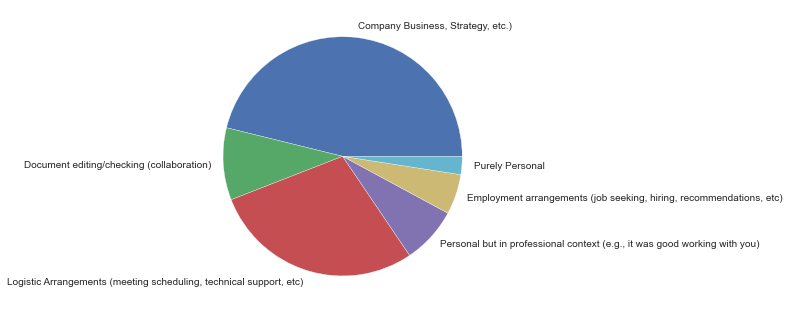

In [13]:
email_files = [f.replace('.cats', '') for f in glob.glob('enron_with_categories/*/*.cats')]
category_cnt = defaultdict(int)
total_freq = 0
label_freq = 0
labeled_files = []

for email_file in email_files:
    labels = get_labels(email_file)
    print(labels)
    for top_cat in labels:
        for sub_cat in labels[top_cat]:
            total_freq += labels[top_cat][sub_cat]
            print(total_freq)

    if LABEL_CAT in labels:
        has_label = False
        for sub_cat in labels[LABEL_CAT]:
            if ALLOWED_SUBLABELS and sub_cat not in ALLOWED_SUBLABELS:
                continue
            freq = labels[LABEL_CAT][sub_cat]
            category_cnt[sub_cat] += freq
            label_freq += freq
            has_label = True
        if has_label:
            labeled_files.append(email_file)

print('Labels account for {0:.1f}% (or {1:d} of {2:d}) of category ratings.'.
      format((100.0*label_freq/total_freq), label_freq, total_freq))
for idx in category_cnt.keys():
    print(' > {0}: {1:d}'.format(idx_to_cat[idx], category_cnt[idx]))

plt.figure()
ax = plt.subplot(111)
ax.pie([category_cnt[i] for i in category_cnt.keys()],
       labels=[idx_to_cat[i] for i in category_cnt.keys()])
plt.show()

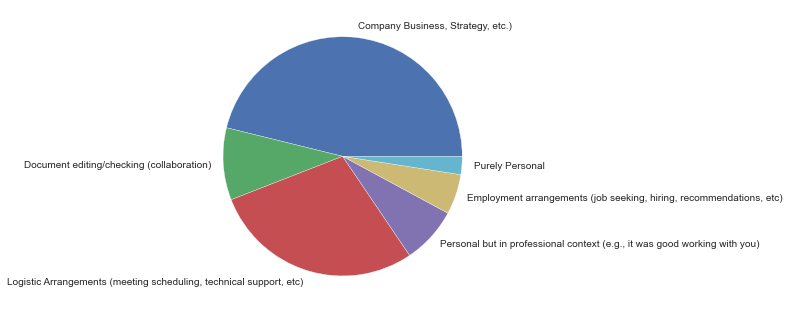

In [14]:
plt.figure()
ax = plt.subplot(111)
ax.pie([category_cnt[i] for i in category_cnt.keys()],
       labels=[idx_to_cat[i] for i in category_cnt.keys()])
plt.show()

In [16]:
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')

word_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

from nltk.tokenize import TweetTokenizer



def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

def preprocess(filename):
    with open(filename) as f:
        message = email.message_from_file(f)
    
    words = []
    message_count = 1
    include_text = True
    for line in message.get_payload().split('\n'):
        clean_line = clean_text(line)

        # exclude forwarded information
        if ('forwarded' in clean_line.lower() or 'original' in clean_line.lower()) and '--' in line:
            message_count += 1
            include_text = False
        if include_text:
            words.extend([stemmer.stem(word) for word in word_tokenize(clean_line)]) ##Stemming
            words.extend([lemmatizer.lemmatize(word) for word in word_tokenizer.tokenize(clean_line)]) ### Lemmatizing
            

    tos = [address.strip() for address in (message['To'] or '').split(',')]
    froms = [address.strip() for address in (message['From'] or '').split(',')]
    
    return [word for word in words if word not in stoplist], tos, froms, [message_count]

filename = email_files[4]+'.txt'

print('--- ORIGINAL TEXT ---')
with open(filename) as f:
    print(f.read())

print('')

print('--- PREPROCESSED TEXT ---')
m, tos, froms, message_count = preprocess(filename)
print(m)
print(tos)
print(froms)
print(message_count)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\varsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\varsh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


--- ORIGINAL TEXT ---
Message-ID: <20866019.1075863331634.JavaMail.evans@thyme>
Date: Mon, 5 Mar 2001 19:23:00 -0800 (PST)
From: drew.fossum@enron.com
To: darrell.schoolcraft@enron.com
Subject: TW Gas Sales: PRIVILEGED AND CONFIDENTIAL ATTORNEY CLIENT PRIVILEGE
Cc: danny.mccarty@enron.com, steven.harris@enron.com, kevin.hyatt@enron.com
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
Bcc: danny.mccarty@enron.com, steven.harris@enron.com, kevin.hyatt@enron.com
X-From: Drew Fossum
X-To: Darrell Schoolcraft <Darrell Schoolcraft/ET&S/Enron@ENRON>
X-cc: Danny McCarty <Danny McCarty/ET&S/Enron@Enron>, Steven Harris <Steven Harris/ET&S/Enron@ENRON>, Kevin Hyatt <Kevin Hyatt/Enron@EnronXGate>
X-bcc: 
X-Folder: \DFOSSUM (Non-Privileged)\Fossum, Drew\'Sent Mail
X-Origin: Fossum-D
X-FileName: DFOSSUM (Non-Privileged).pst

In anticipation of potential litigation involving TW's operational activities, please prepare an analysis for me of the reasons for T

In [18]:
dct = Dictionary() 
addrDict = Dictionary()

new_labeled_files = []

for email_file in labeled_files:
    content, tos, froms, _ = preprocess(email_file + '.txt')
    if content:
        dct.add_documents([content])
        addrDict.add_documents([tos, froms])
        new_labeled_files.append(email_file)

labeled_files = new_labeled_files 

dct.filter_extremes(no_below=1, no_above=0.5, keep_n=NUM_WORDS)

In [19]:
def get_bows(filenames):
    bows = []
    one_hot_sentences = []
    all_tos = []
    all_froms = []
    all_message_counts = []
    for filename in filenames:
        # get content and all metadata
        content, tos, froms, message_count = preprocess(filename + '.txt')

        # one-hot encode to addresses
        tos = addrDict.doc2bow(tos)
        one_hot_tos = np.zeros(len(addrDict.items()))
        for t in tos:
            one_hot_tos[t[0]] = t[1]
        all_tos.append(one_hot_tos)

        # one-hot encode from addresses
        froms = addrDict.doc2bow(froms)
        one_hot_froms = np.zeros(len(addrDict.items()))
        for f in froms:
            one_hot_froms[f[0]] = f[1]
        all_froms.append(one_hot_froms)

        # one-hot-encode sentences
        one_hot_sentence = []
        idxs = dct.doc2idx(content)
        for idx in idxs:
            if idx == -1:
                continue
            one_hot_word = np.zeros(NUM_WORDS)
            one_hot_word[idx] = 1
            one_hot_sentence.append(one_hot_word)
        
        # create bag of words representation for sentences
        bow = dct.doc2bow(content)
        features = np.zeros(NUM_WORDS)
        for word in bow:
            features[word[0]] = word[1] if word[1] else 0
        
        bows.append(features)
        one_hot_sentences.append(one_hot_sentence)
        all_message_counts.append(message_count)
    return bows, one_hot_sentences, all_tos, all_froms, all_message_counts

bows, one_hot_sentences, all_tos, all_froms, all_message_counts = get_bows(labeled_files)
     

In [20]:
email_labels = []
for email_file in labeled_files:
    email_labels.append(tuple(set(get_labels(email_file)[LABEL_CAT].keys()).intersection(set(ALLOWED_SUBLABELS))))

multilabel_binarizer = MultiLabelBinarizer()
y1 = multilabel_binarizer.fit_transform(email_labels)

In [21]:
y1

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [23]:
arr_1d = y1.ravel()
unique, counts = np.unique(arr_1d, return_counts=True)
for i in range(len(unique)):
    print("Frequency of ", unique[i], " is ", counts[i])

Frequency of  0  is  7053
Frequency of  1  is  1611


In [24]:
y1.shape

(1444, 6)

In [51]:
def print_ndarray(arr):
    if arr.size == 1:
        print(arr[0])
    else:
        for i in range(arr.shape[0]):
            print_ndarray(arr[i])

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [26]:
word_count = NUM_WORDS
to_from_count = len(all_tos[0]) + len(all_froms[0])

Model = namedtuple('Model', ['name', 'instance'])
Result = namedtuple('Result', ['smote', 'to_from', 'message_count', 'model_name', 'f1_score', 'accuracy_score', 'precision_score'])

results = []
all_models = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
for config in [{'to_from': False, 'message_count': False, 'smote': False},
               {'to_from': True, 'message_count': False, 'smote': False},
               {'to_from': False, 'message_count': True, 'smote': False},
               {'to_from': True, 'message_count': True, 'smote': False},
               {'to_from': False, 'message_count': False, 'smote': True},
               {'to_from': True, 'message_count': False, 'smote': True},
               {'to_from': False, 'message_count': True, 'smote': True},
               {'to_from': True, 'message_count': True, 'smote': True}]:
    print('Include To/From:', config['to_from'])
    print('Include Message Count:', config['message_count'])
    models = [Model(name='Logistic Regression',
                    instance=OneVsRestClassifier(LogisticRegression(multi_class='ovr', solver='lbfgs'))),
              Model(name='Decision Tree',
                    instance=DecisionTreeClassifier()),
              Model(name='Random Forest',
                    instance=RandomForestClassifier(n_estimators=100)),
    ]

x = []
for bow, tos, froms, message_count in zip(bows, all_tos, all_froms, all_message_counts):
    current = list(bow)
    if config['to_from']:
        current += list(tos + froms)
    if config['message_count']:
        current += list(message_count)
    x.append(current)

Include To/From: False
Include Message Count: False
Include To/From: True
Include Message Count: False
Include To/From: False
Include Message Count: True
Include To/From: True
Include Message Count: True
Include To/From: False
Include Message Count: False
Include To/From: True
Include Message Count: False
Include To/From: False
Include Message Count: True
Include To/From: True
Include Message Count: True


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.20, random_state=9000)

In [28]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

Classification 

In [29]:
# Initialize a multi-output Logistic Regression
clf = OneVsRestClassifier(LogisticRegression(multi_class='ovr', solver='lbfgs'))

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
t_acc = accuracy_score(y_train,y_train_pred)
L = log_loss(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print("Loss: {:.2f}".format(L))
print("Training Accuracy: {:.2f}".format(t_acc))


C:\Users\varsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\varsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy: 0.52
Loss: 8.49
Training Accuracy: 0.86


In [30]:
# Generate a classification 
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       148
           1       0.75      0.43      0.55         7
           2       0.30      0.33      0.32        18
           3       0.77      0.63      0.69       106
           4       0.30      0.19      0.23        16
           5       0.47      0.28      0.35        25

   micro avg       0.71      0.58      0.64       320
   macro avg       0.56      0.42      0.48       320
weighted avg       0.70      0.58      0.64       320
 samples avg       0.61      0.61      0.60       320



C:\Users\varsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.metrics import multilabel_confusion_matrix

# assuming y_true and y_pred are the true labels and predicted labels, respectively
cm = multilabel_confusion_matrix(y_test, y_pred)

print(cm)


[[[113  28]
  [ 47 101]]

 [[281   1]
  [  4   3]]

 [[257  14]
  [ 12   6]]

 [[163  20]
  [ 39  67]]

 [[266   7]
  [ 13   3]]

 [[256   8]
  [ 18   7]]]


K Nearest Neighbour Classifier

In [32]:
# Initialize a multi-output K-Nearest Neighbors classifier
clf = MultiOutputClassifier(KNeighborsClassifier())

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
L = log_loss(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print("Loss: {:.2f}".format(L))
print("Training Accuracy: {:.2f}".format(t_acc))

Accuracy: 0.48
Loss: 10.94
Training Accuracy: 0.86


In [33]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.79      0.57      0.66       148
           1       1.00      0.14      0.25         7
           2       0.57      0.22      0.32        18
           3       0.62      0.68      0.65       106
           4       1.00      0.06      0.12        16
           5       0.71      0.20      0.31        25

   micro avg       0.70      0.53      0.60       320
   macro avg       0.78      0.31      0.38       320
weighted avg       0.73      0.53      0.57       320
 samples avg       0.56      0.55      0.55       320



C:\Users\varsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# assuming y_true and y_pred are the true labels and predicted labels, respectively
cm = multilabel_confusion_matrix(y_test, y_pred)

print(cm)


[[[118  23]
  [ 63  85]]

 [[282   0]
  [  6   1]]

 [[268   3]
  [ 14   4]]

 [[138  45]
  [ 34  72]]

 [[273   0]
  [ 15   1]]

 [[262   2]
  [ 20   5]]]


Random Forest Classifier

In [36]:
# Initialize a multi-output Random Forest classifier
clf = MultiOutputClassifier(RandomForestClassifier(n_estimators=100))

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
L = log_loss(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print("Loss: {:.2f}".format(L))
print("Training Accuracy: {:.2f}".format(t_acc))

Accuracy: 0.56
Loss: 7.30
Training Accuracy: 0.86


In [63]:
# Generate a classification 
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       148
           1       0.75      0.43      0.55         7
           2       0.70      0.39      0.50        18
           3       0.87      0.57      0.69       106
           4       0.50      0.06      0.11        16
           5       0.86      0.24      0.38        25

   micro avg       0.81      0.59      0.68       320
   macro avg       0.74      0.41      0.50       320
weighted avg       0.80      0.59      0.66       320
 samples avg       0.63      0.61      0.62       320



C:\Users\varsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# assuming y_true and y_pred are the true labels and predicted labels, respectively
cm = multilabel_confusion_matrix(y_test, y_pred)

print(cm)


[[[111  30]
  [ 37 111]]

 [[281   1]
  [  4   3]]

 [[268   3]
  [ 11   7]]

 [[174   9]
  [ 46  60]]

 [[272   1]
  [ 15   1]]

 [[263   1]
  [ 19   6]]]


Multi Output MLP Classifier

In [38]:
# Initialize a multi-output MLPclassifier
clf = MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(10,)))

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
L = log_loss(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print("Loss: {:.2f}".format(L))
print("Training Accuracy: {:.2f}".format(t_acc))

C:\Users\varsh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\varsh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\varsh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\varsh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\varsh\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Accuracy: 0.54
Loss: 8.66
Training Accuracy: 0.86


In [39]:
# Generate a classification 
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       148
           1       0.75      0.43      0.55         7
           2       0.38      0.44      0.41        18
           3       0.77      0.69      0.73       106
           4       0.50      0.31      0.38        16
           5       0.47      0.32      0.38        25

   micro avg       0.73      0.63      0.67       320
   macro avg       0.61      0.48      0.53       320
weighted avg       0.73      0.63      0.67       320
 samples avg       0.64      0.65      0.63       320



C:\Users\varsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
from sklearn.metrics import multilabel_confusion_matrix

# assuming y_true and y_pred are the true labels and predicted labels, respectively
cm = multilabel_confusion_matrix(y_test, y_pred)

print(cm)


[[[116  25]
  [ 44 104]]

 [[281   1]
  [  4   3]]

 [[258  13]
  [ 10   8]]

 [[161  22]
  [ 33  73]]

 [[268   5]
  [ 11   5]]

 [[255   9]
  [ 17   8]]]


LSTM 

In [40]:
VOCAB_SIZE = NUM_WORDS
TOPIC_SIZE = len(ALLOWED_SUBLABELS)

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, output_size)

    def forward(self, i):
        output, _ = self.lstm(i)
        output = output[-1,:]
        output = self.l2(output)
        return output

n_hidden = 128
model = LSTM(VOCAB_SIZE, n_hidden, TOPIC_SIZE)

In [41]:
print_every = 1000
plot_every = 500

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

# Keep track of losses for plotting
current_loss = 0
all_losses = []

lr = 0.005
n_epochs = 5

pos_weight = torch.tensor([(516.0-w)/w for w in [96.0, 97.0, 56.0, 85.0, 125.0, 60.0]])
loss_fn = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=lr, amsgrad=True)

start = time.time()

x_train, x_test, y_train, y_test = train_test_split(one_hot_sentences, multilabel_binarizer.fit_transform(email_labels), test_size=0.15, random_state=9000)
def get_random_training_example():
    idx = np.random.randint(0, len(x_train))
    e, category = x_train[idx], y_train[idx]
    if len(e) == 0:
        return get_random_training_example()
    return e, category

In [42]:
for epoch in range(1, n_epochs+1):
    model.train()
    e, category = get_random_training_example()
    y = torch.tensor(category).view(1, -1).float()
    x = torch.tensor(e).view(-1, 1, VOCAB_SIZE).float()

    yhat = model(x)
    yhat = yhat.view(1, -1)
    
    loss = loss_fn(yhat, y)
    loss_item = loss.item()
    current_loss += loss_item
    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()

    # Print epoch number, loss, name and guess
    if epoch % print_every == 0:
        print('%d %d%% (%s) %.10f' % (epoch, epoch / n_epochs * 100, timeSince(start), loss_item))

    # Add current loss avg to list of losses
    if epoch % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

C:\Users\varsh\AppData\Local\Temp\ipykernel_11900\3332521912.py:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  x = torch.tensor(e).view(-1, 1, VOCAB_SIZE).float()


In [43]:

current_loss

5.186728060245514

In [139]:
correct = 0
total = 0

model.eval()

for i in range(len(x_test)):
    x = torch.tensor(x_test[i]).view(-1, 1, VOCAB_SIZE).float()
    y = torch.tensor(y_test[i]).view(1, -1).float()

    if x.size(0) > 0:
        output = model(x)
        last_output = output[-1, :]
        predicted = (last_output > 0.5).float()

        correct += (predicted == y).sum().item()
        total += y.size(0)

accuracy = correct / total
print('Accuracy: %.2f%%' % (accuracy * 10))





Accuracy: 50.15%


Exploratory Data Analysis

In [104]:
l_files = labeled_files
append_str = '.txt'
prf = 'C:/Users/varsh/Downloads/' 
# Append suffix / prefix to strings in list
pre_res = [prf+sub for sub in l_files]
suf_res = [sub+append_str for sub in pre_res]

In [125]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame()

df.insert(0, column='Filename', value=suf_res)

In [132]:
y1

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [131]:
df = pd.DataFrame(y1, columns = ['Company Business, Strategy, etc.','Purely Personal','Personal but in professional context (e.g., it was good working with you)',
    'Logistic Arrangements (meeting scheduling, technical support, etc)',
  'Employment arrangements (job seeking, hiring, recommendations, etc)',
    'Document editing/checking (collaboration)'])

In [107]:
import os
import csv
### Converting the .txt files in each folder to csv file


file_list = suf_res
csv_file_path = 'C:/Users/varsh/Downloads/enron_with_categories/'
csv_file_name = 'labeled_files.csv'
for i in range(1,9):
    csv_file = open(csv_file_path + str(i) + '/' + csv_file_name, 'w')
    csv_writer = csv.writer(csv_file)
    for file_name in file_list:
        if file_name.endswith('.txt'):
            with open(file_name, 'r') as file:
                file_contents = file.read()
                csv_writer.writerow([file_name, file_contents])

    csv_file.close()

In [121]:
import os
import csv
### Converting the .txt files in each folder to csv file


file_list = suf_res

csv_file_path = 'C:/Users/varsh/Downloads/enron_with_categories/labeled_file.csv'
csv_file = open(csv_file_path, 'w')
csv_writer = csv.writer(csv_file)
for file_name in file_list:
    if file_name.endswith('.txt'):
        with open(file_name, 'r') as file:
            file_contents = file.read()
            csv_writer.writerow([file_name, file_contents])

csv_file.close()

In [122]:
import pandas as pd
import os
import csv
R = pd.read_csv('C:/Users/varsh/Downloads/enron_with_categories/labeled_file.csv')
R.columns = ['Filename', 'Message']

In [129]:
df

,"Company Business, Strategy, etc.",Purely Personal,"Personal but in professional context (e.g., it was good working with you)","Logistic Arrangements (meeting scheduling, technical support, etc)","Employment arrangements (job seeking, hiring, recommendations, etc)",Document editing/checking (collaboration)
0,1,0,0,0,0,0
1,1,0,0,0,0,1
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
1439,0,0,0,0,0,1
1440,0,0,0,0,0,1
1441,0,0,0,0,0,1
1442,0,0,0,0,0,1


KeyError: 'Filename'